In [2]:
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import *
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit import BasicAer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

from time import time
import numpy as np
from functools import reduce

import matplotlib.pyplot as plt

In [11]:
def read_data(datafile, labelindex):
    data_file = open(datafile)
    datalines = data_file.readlines()
    database = []
    labels = []
    all_labels = set()
    for data in datalines[1:]:
        feature_vector = list(data.strip().split(","))
        database.append(list(map(float, feature_vector[:labelindex] + feature_vector[labelindex+1:])))
        labels.append(feature_vector[labelindex])
        all_labels.add(feature_vector[labelindex])
    label_encodings = {d:i for i,d in enumerate(all_labels)}
    encoded_labels = [label_encodings[label] for label in labels]

    return np.array(database), np.array(encoded_labels)

In [107]:
class classify:        
    def __init__(self, datafile, labelindex):
        self.database, self.labels = read_data(datafile, labelindex)
        self.feature_dim = self.database.shape[1]
    
    def split(self, train_size=0.8, random_state=42):
        return train_test_split(self.database, self.labels, train_size=train_size, random_state=random_state)
    
    def qsvc(self, feature_map=None, seed=1376):
        if feature_map is None:
            feature_map = ZFeatureMap(self.feature_dim)

        kernel = QuantumKernel(feature_map=feature_map,
                                    quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                                    shots=1,
                                                    seed_simulator=seed,
                                                    seed_transpiler=seed))

        # print("Feature Map : ", kernel.feature_map.decompose())
        # print("Kerenel matrix : ", kernel.evaluate(self.database, self.labels))
        qsvc1 = QSVC(quantum_kernel=kernel)
        self.classifier = qsvc1

    def csvc(self, kernel="rbf", gamma="scale", seed=1376):
        csvc1 = SVC(kernel=kernel, gamma=gamma, random_state=seed)
        self.classifier = csvc1

    def train(self, train_data, train_labels):
        start = time()
        self.classifier.fit(train_data, train_labels)
        end = time()
        print("Time taken to train: ", end-start)
    
    def predict(self, test_data):
        start = time()
        pred_labels = self.classifier.predict(test_data)
        end = time()
        print("Time taken to predict: ", end-start)
        return pred_labels
    
    def get_scores(self, test_labels, pred_labels):
        acc =  accuracy_score(test_labels, pred_labels)
        prec = precision_score(test_labels, pred_labels, average="macro")
        recall = recall_score(test_labels, pred_labels, average="macro")
        f1 = f1_score(test_labels, pred_labels, average="macro")

        print("Accuracy: ", acc)
        print("Precision: ", prec)
        print("Recall: ", recall)
        print("F1: ", f1)

        return acc, prec, recall, f1

In [124]:
def eq_8(x):
    return np.pi*reduce(lambda a,b: a*b, x)

def eq_8_1(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            phi += x[i]*x[j]
    return (np.pi/2)*phi

def eq_8_2(x):
    phi = x[0] if len(x) == 1 else x[0]*x[1]
    return np.pi*phi

def eq_8_3(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                phi += x[i]*x[j]*x[k]
    return (np.pi/2)*phi

def eq_8_4(x):
    phi = x[0] if len(x) == 1 else x[0]*x[1]*x[2]
    return np.pi*phi

In [117]:
def eq_9(x):
    return (np.pi/2)*reduce(lambda a,b: (1-a)*(1-b), x)

def eq_9_1(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            phi += (1-x[i])*(1-x[j])
    return (np.pi/2)*phi

def eq_9_2(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                phi += (1-x[i])*(1-x[j])*(1-x[k])
    return (np.pi/2)*phi

In [8]:
x = [0, np.log(4)/np.log(np.e)]
eq_10(x)

3.9946517054765955

In [3]:
def eq_10(x):
    return np.pi*reduce(lambda a,b: np.exp(np.square(a-b)/8), x)

def eq_10_1(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            phi += np.exp(np.square(x[i]-x[j])/8)
    return np.pi*phi

def eq_10_2(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                phi += np.exp(np.square(x[i]-x[j])/8)*np.exp(np.square(x[i]-x[k])/8)*np.exp(np.square(x[j]-x[k])/8)
    return np.pi*phi

In [119]:
def eq_11(x):
    return (np.pi/3)*reduce(lambda a,b: 1/(np.cos(a)*np.cos(b)), x)

def eq_11_1(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            phi += 1/(np.cos(x[i])*np.cos(x[j]))
    return (np.pi/3)*phi

def eq_11_2(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                phi += 1/(np.cos(x[i])*np.cos(x[j])*np.cos(x[k]))
    return (np.pi/3)*phi

In [120]:
def eq_12(x):
    return np.pi*reduce(lambda a,b: np.cos(a)*np.cos(b), x)

def eq_12_1(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            phi += np.cos(x[i])*np.cos(x[j])
    return np.pi*phi 

def eq_12_2(x):
    phi = x[0] if len(x) == 1 else 0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                phi += np.cos(x[i])*np.cos(x[j])*np.cos(x[k])
    return np.pi*phi       

In [160]:
def score_encoding(func=None, datafile="Raisin_Dataset.csv", dim=7):
    qc = classify(datafile, dim)

    train_data, test_data, train_labels, test_labels = qc.split()
    if func:
        fm = ZZFeatureMap(qc.feature_dim, data_map_func=func)
        qc.qsvc(feature_map=fm)
    else:
        qc.qsvc()
    qc.train(train_data, train_labels)
    pred_labels = qc.predict(test_data)
    return qc.get_scores(test_labels, pred_labels)

Default: $\phi = \prod_{i}(\pi - x_i)$

Eq. $8$: $\phi = \pi\prod_{i}x_i$

Eq. $8.1$: $\phi = \frac{\pi}{2}\sum_i x_i\Big(\sum_{j<i}x_j\Big)$

Eq. $8.2$: $\phi = \pi x_0x_1$

Eq. $8.3$: $\phi = \frac{\pi}{2}\sum_i x_i\Big[\sum_{j<i}x_j\Big(\sum_{k<j}x_k\Big)\Big]$

Eq. $8.4$: $\phi = \pi x_0x_1x_2$

Eq. $9$: $\phi = \frac{\pi}{2}\prod_{i}(1-x_i)$

Eq. $9.1$: $\phi = \frac{\pi}{2}\sum_i (1-x_i)\Big(\sum_{j<i}(1-x_j)\Big)$

Eq. $9.2$: $\phi = \frac{\pi}{2}\sum_i (1-x_i)\Big[\sum_{j<i}(1-x_j)\Big(\sum_{k<j}(1-x_k)\Big)\Big]$

In [115]:
score_def = score_encoding()

Time taken to train:  18.143433570861816
Time taken to predict:  26.080957889556885
Accuracy:  0.5777777777777777
Precision:  0.5783102766798419
Recall:  0.5784265215239981
F1:  0.5777256451413755


In [138]:
score_8 = score_encoding(eq_8)
print()
score_8_1 = score_encoding(eq_8_1)
print()
score_8_2 = score_encoding(eq_8_2)

Time taken to train:  52.090930700302124
Time taken to predict:  59.48172903060913
Accuracy:  0.49444444444444446
Precision:  0.49566563467492264
Recall:  0.4956704601682336
F1:  0.4944288403963085

Time taken to train:  59.07379174232483
Time taken to predict:  67.11388158798218
Accuracy:  0.4722222222222222
Precision:  0.47583667140457425
Recall:  0.4768678871845621
F1:  0.46853146853146854

Time taken to train:  53.53113007545471
Time taken to predict:  63.09943723678589
Accuracy:  0.49444444444444446
Precision:  0.49566563467492264
Recall:  0.4956704601682336
F1:  0.4944288403963085


In [ ]:
score_8_3 = score_encoding(eq_8_3)
print()
score_8_4 = score_encoding(eq_8_4)

In [141]:
score_9 = score_encoding(eq_9)
print()
score_9_1 = score_encoding(eq_9_1)
# print()
# score_9_2 = score_encoding(eq_9_2)

Time taken to train:  107.05877900123596
Time taken to predict:  112.11637759208679
Accuracy:  0.5444444444444444
Precision:  0.5439723320158103
Recall:  0.5440376051459673
F1:  0.5439377085650723

Time taken to train:  116.44030165672302
Time taken to predict:  184.4558367729187
Accuracy:  0.5444444444444444
Precision:  0.5439723320158103
Recall:  0.5440376051459673
F1:  0.5439377085650723


In [142]:
score_9_1

(0.5444444444444444,
 0.5439723320158103,
 0.5440376051459673,
 0.5439377085650723)

In [144]:
score_10 = score_encoding(eq_10)
print()
score_10_1 = score_encoding(eq_10_1)
# print()
# score_10_2 = score_encoding(eq_10_2)

ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

In [145]:
score_11 = score_encoding(eq_11)
print()
score_11_1 = score_encoding(eq_11_1)
# print()
# score_11_2 = score_encoding(eq_11_2)

Time taken to train:  119.1911780834198
Time taken to predict:  138.52509784698486
Accuracy:  0.4722222222222222
Precision:  0.473374613003096
Recall:  0.4734042553191489
F1:  0.4722059322818606

Time taken to train:  99.3009135723114
Time taken to predict:  108.52309250831604
Accuracy:  0.4722222222222222
Precision:  0.473374613003096
Recall:  0.4734042553191489
F1:  0.4722059322818606


In [146]:
score_12 = score_encoding(eq_12)
print()
score_12_1 = score_encoding(eq_12_1)
# print()
# score_12_2 = score_encoding(eq_12_2)

Time taken to train:  48.18182420730591
Time taken to predict:  56.507065296173096
Accuracy:  0.5666666666666667
Precision:  0.5684523809523809
Recall:  0.5682830282038595
F1:  0.56661316211878

Time taken to train:  63.79293632507324
Time taken to predict:  72.43910193443298
Accuracy:  0.5666666666666667
Precision:  0.5684523809523809
Recall:  0.5682830282038595
F1:  0.56661316211878


In [154]:
accuracies = [score_def[0], score_8[0], score_8_1[0], score_8_2[0], score_9[0], score_9_1[0], score_11[0], score_11_1[0], score_12[0], score_12_1[0]]
precisions = [score_def[1], score_8[1], score_8_1[1], score_8_2[1], score_9[1], score_9_1[1], score_11[1], score_11_1[1], score_12[1], score_12_1[1]]
recalls = [score_def[2], score_8[2], score_8_1[2], score_8_2[2], score_9[2], score_9_1[2], score_11[2], score_11_1[2], score_12[2], score_12_1[2]]
f1s = [score_def[3], score_8[3], score_8_1[3], score_8_2[3], score_9[3], score_9_1[3], score_11[3], score_11_1[3], score_12[3], score_12_1[3]]
labels = ["def", "8", "8.1", "8.2", "9", "9.1", "11", "11.1", "12", "12.1"]

Text(0, 0.5, 'Score')

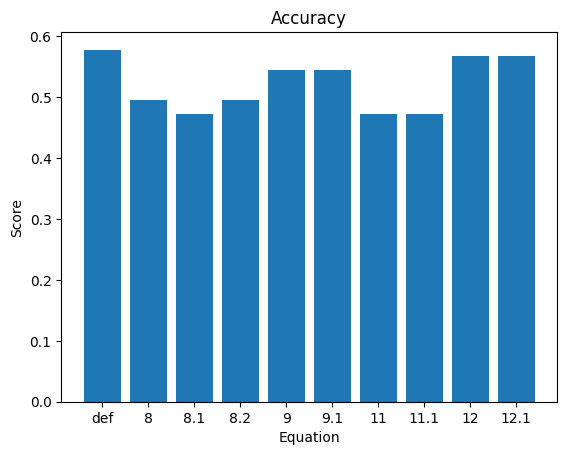

In [155]:
plt.bar(labels, accuracies)
plt.title('Accuracy')
plt.xlabel('Equation')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

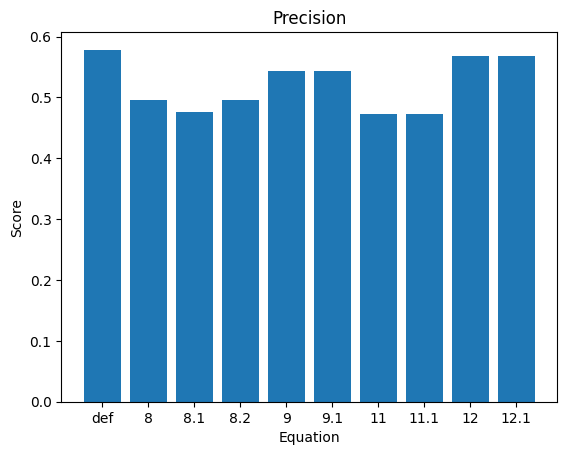

In [156]:
plt.bar(labels, precisions)
plt.title('Precision')
plt.xlabel('Equation')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

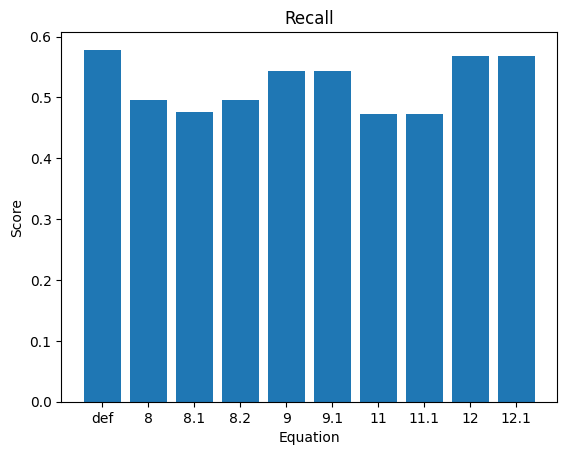

In [157]:
plt.bar(labels, recalls)
plt.title('Recall')
plt.xlabel('Equation')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

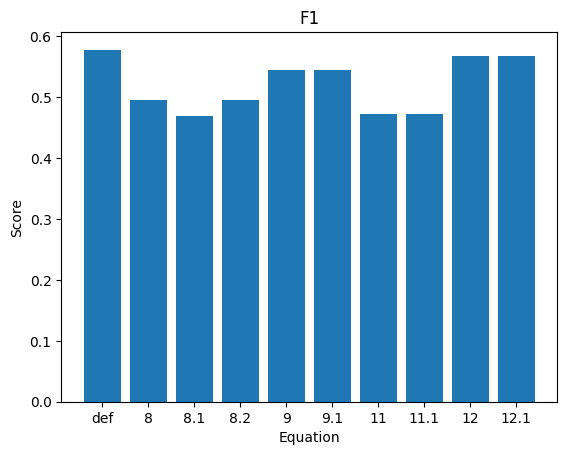

In [158]:
plt.bar(labels, f1s)
plt.title('F1')
plt.xlabel('Equation')
plt.ylabel('Score')

***

In [166]:
cc1 = classify("Raisin_Dataset.csv", 7)
train_data, test_data, train_labels, test_labels = cc1.split()
cc1.csvc(kernel='linear')
cc1.train(train_data, train_labels)
pred_labels = cc1.predict(test_data)
cc1.get_scores(test_labels, pred_labels)

Time taken to train:  42.93009638786316
Time taken to predict:  0.0009930133819580078
Accuracy:  0.8555555555555555
Precision:  0.8572488866897576
Recall:  0.8572488866897576
F1:  0.8555555555555555


(0.8555555555555555,
 0.8572488866897576,
 0.8572488866897576,
 0.8555555555555555)

In [167]:
cc2 = classify("Raisin_Dataset.csv", 7)
train_data, test_data, train_labels, test_labels = cc2.split()
cc2.csvc(kernel='poly')
cc2.train(train_data, train_labels)
pred_labels = cc2.predict(test_data)
cc2.get_scores(test_labels, pred_labels)

Time taken to train:  0.06989192962646484
Time taken to predict:  0.004158735275268555
Accuracy:  0.8277777777777777
Precision:  0.8355524260658046
Recall:  0.824220682830282
F1:  0.8254012954097438


(0.8277777777777777, 0.8355524260658046, 0.824220682830282, 0.8254012954097438)

In [168]:
cc3 = classify("Raisin_Dataset.csv", 7)
train_data, test_data, train_labels, test_labels = cc3.split()
cc3.csvc(kernel='rbf')
cc3.train(train_data, train_labels)
pred_labels = cc3.predict(test_data)
cc3.get_scores(test_labels, pred_labels)

Time taken to train:  0.026326894760131836
Time taken to predict:  0.01186990737915039
Accuracy:  0.85
Precision:  0.8541798007817425
Recall:  0.8474764967837705
F1:  0.8486499953287034


(0.85, 0.8541798007817425, 0.8474764967837705, 0.8486499953287034)

***

## Heart Failure Dataset

In [162]:
heart_score_def = score_encoding(datafile="HeartFailure_Dataset.csv", dim=12)

Time taken to train:  75.65630865097046
Time taken to predict:  3.3448593616485596
Accuracy:  0.5833333333333334
Precision:  0.2916666666666667
Recall:  0.5
F1:  0.3684210526315789


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
heart_score_8 = score_encoding(func=eq_8, datafile="HeartFailure_Dataset.csv", dim=12)

Time taken to train:  45.36283564567566
Time taken to predict:  56.701178789138794
Accuracy:  0.5833333333333334
Precision:  0.5431034482758621
Recall:  0.5057142857142857
F1:  0.4026284348864994


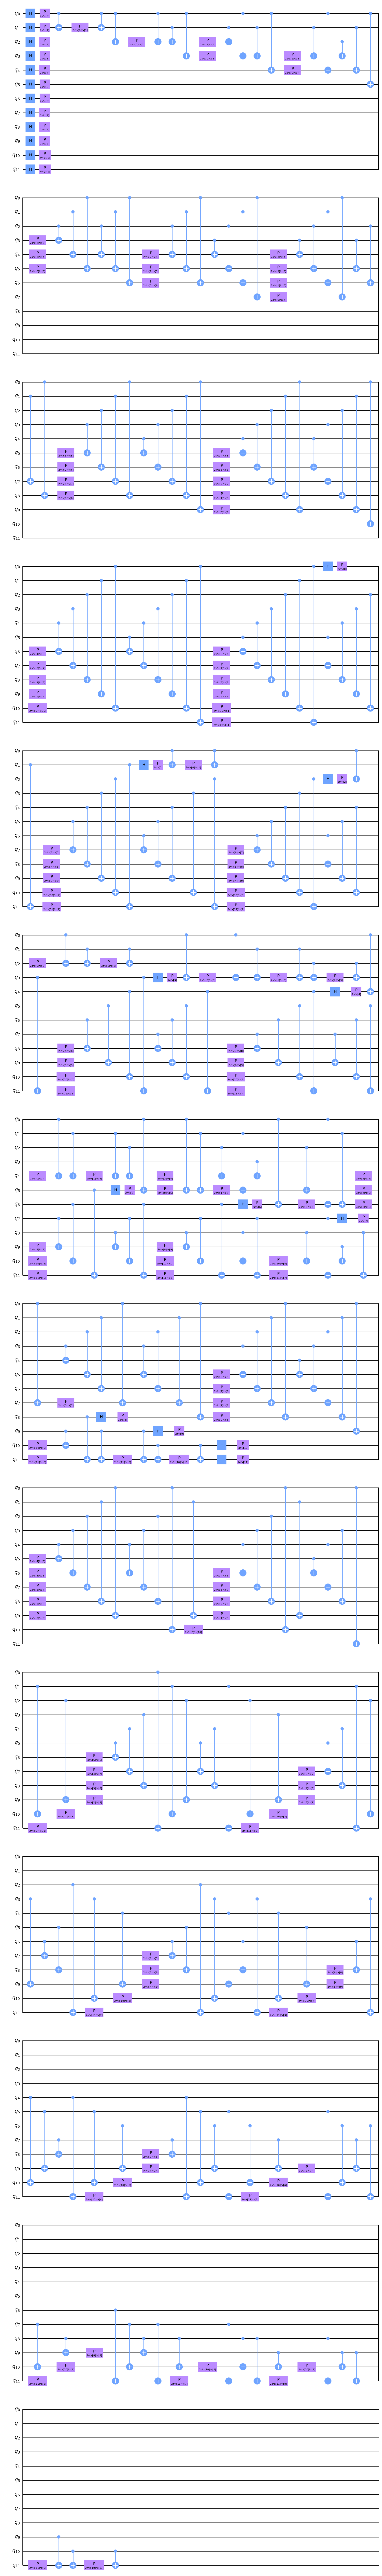

In [182]:
qc_heart_fm = ZZFeatureMap(12, data_map_func=eq_8)
qc_heart_fm.decompose().draw(output='mpl')

In [169]:
heart_score_8_1 = score_encoding(func=eq_8_1, datafile="HeartFailure_Dataset.csv", dim=12)

Time taken to train:  98.96534371376038
Time taken to predict:  84.8970775604248
Accuracy:  0.5833333333333334
Precision:  0.2916666666666667
Recall:  0.5
F1:  0.3684210526315789


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


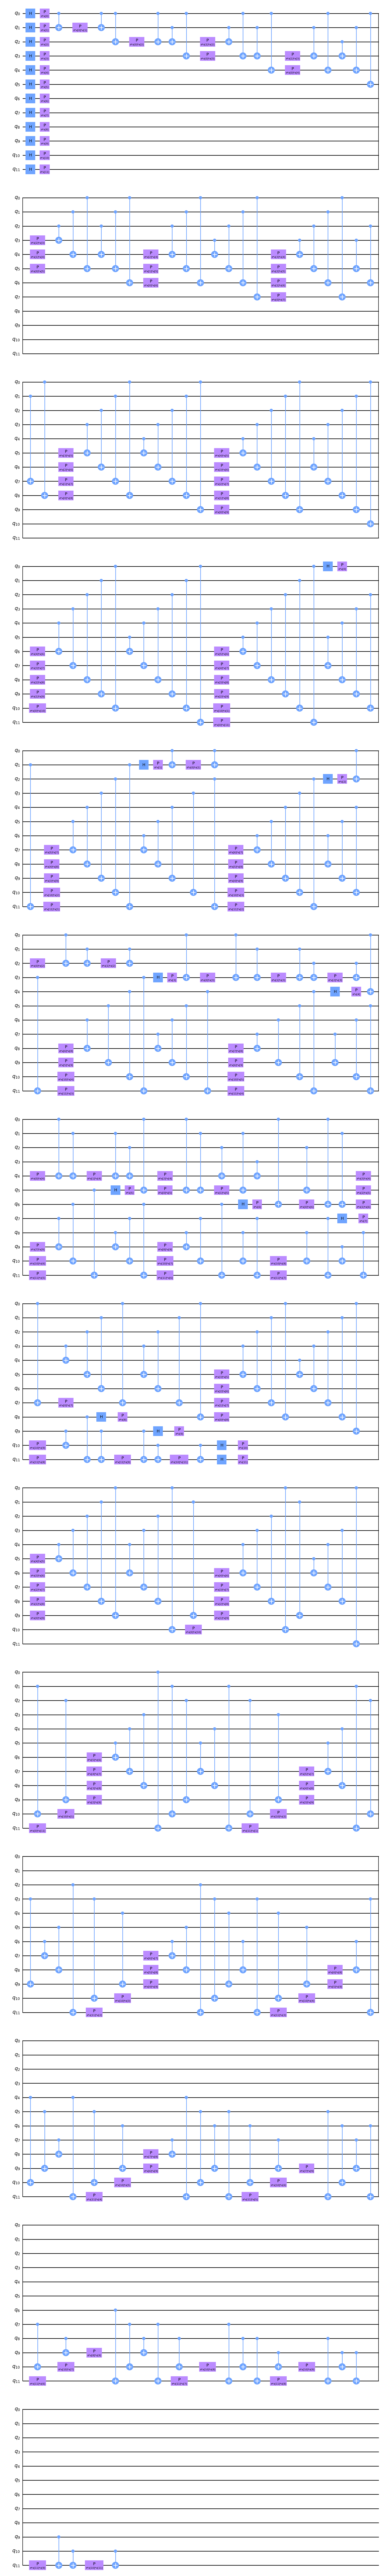

In [185]:
qc_heart_fm_81 = ZZFeatureMap(12, data_map_func=eq_8_1)
qc_heart_fm_81.decompose().draw(output='mpl')

In [170]:
heart_score_8_2 = score_encoding(func=eq_8_2, datafile="HeartFailure_Dataset.csv", dim=12)

Time taken to train:  51.0793833732605
Time taken to predict:  66.60655474662781
Accuracy:  0.5833333333333334
Precision:  0.5431034482758621
Recall:  0.5057142857142857
F1:  0.4026284348864994


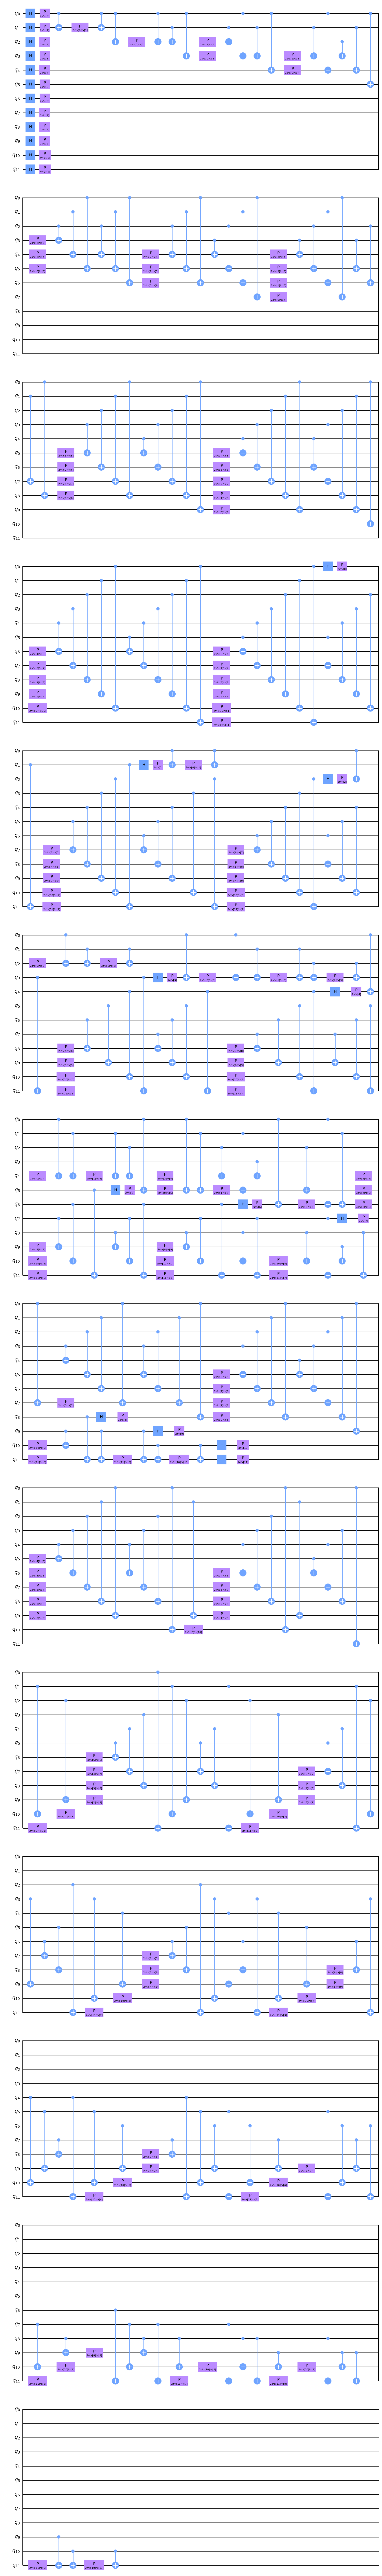

In [183]:
qc_heart_fm_82 = ZZFeatureMap(12, data_map_func=eq_8_2)
qc_heart_fm_82.decompose().draw(output='mpl')

In [172]:
heart_cc1 = classify("HeartFailure_Dataset.csv", 12)
train_data, test_data, train_labels, test_labels = heart_cc1.split()
heart_cc1.csvc(kernel='linear')
heart_cc1.train(train_data, train_labels)
pred_labels = heart_cc1.predict(test_data)
heart_cc1.get_scores(test_labels, pred_labels)

Time taken to train:  35.19485068321228
Time taken to predict:  0.0009968280792236328
Accuracy:  0.75
Precision:  0.7872670807453416
Recall:  0.7114285714285714
F1:  0.715099715099715


(0.75, 0.7872670807453416, 0.7114285714285714, 0.715099715099715)

In [173]:
heart_cc2 = classify("HeartFailure_Dataset.csv", 12)
train_data, test_data, train_labels, test_labels = heart_cc2.split()
heart_cc2.csvc(kernel='poly')
heart_cc2.train(train_data, train_labels)
pred_labels = heart_cc2.predict(test_data)
heart_cc2.get_scores(test_labels, pred_labels)

Time taken to train:  0.001992940902709961
Time taken to predict:  0.0
Accuracy:  0.5833333333333334
Precision:  0.2916666666666667
Recall:  0.5
F1:  0.3684210526315789


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5833333333333334, 0.2916666666666667, 0.5, 0.3684210526315789)

In [174]:
heart_cc3 = classify("HeartFailure_Dataset.csv", 12)
train_data, test_data, train_labels, test_labels = heart_cc3.split()
heart_cc3.csvc(kernel='rbf')
heart_cc3.train(train_data, train_labels)
pred_labels = heart_cc3.predict(test_data)
heart_cc3.get_scores(test_labels, pred_labels)

Time taken to train:  0.013001680374145508
Time taken to predict:  0.0018630027770996094
Accuracy:  0.5833333333333334
Precision:  0.2916666666666667
Recall:  0.5
F1:  0.3684210526315789


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5833333333333334, 0.2916666666666667, 0.5, 0.3684210526315789)

In [180]:
c0 = 0
c1 = 0
for i in train_labels:
    if i == 0:
        c0 += 1
    else:
        c1 += 1

print(c0, c1)

71 168


In [181]:
c0 = 0
c1 = 0
for i in test_labels:
    if i == 0:
        c0 += 1
    else:
        c1 += 1

print(c0, c1)

25 35
